In [14]:
%matplotlib inline
import pymc as pm
import numpy as np
from IPython.core.pylabtools import figsize
from matplotlib import  pyplot as plt

In [2]:
parameter = pm.Exponential("poisson_param", 1)
data_generator = pm.Poisson("data_generator", parameter)
data_plus_one = data_generator + 1

In [3]:
parameter.children

{<pymc.distributions.new_dist_class.<locals>.new_class 'data_generator' at 0x11d6f34e0>}

In [4]:
data_generator.parents

{'mu': <pymc.distributions.new_dist_class.<locals>.new_class 'poisson_param' at 0x11d6ecac8>}

In [5]:
data_generator.children

{<pymc.PyMCObjects.Deterministic '(data_generator_add_1)' at 0x11d6f3e48>}

In [6]:
parameter.value

array(0.04235068702294827)

In [7]:
data_generator.value

array(0)

In [8]:
data_plus_one.value

1

In [9]:
lambda_1 = pm.Exponential("lambda_1", 1)
lambda_2 = pm.Exponential("lambda_2", 1)
tau = pm.DiscreteUniform("tau", lower=0, upper=10)

print("lambda_1.value = %.3f" % lambda_1.value)
print("lambda_2.value = %.3f" % lambda_2.value)
print("tau.value = %.3f" % tau.value, "\n")

lambda_1.random(), lambda_2.random(), tau.random()

print("After calling random() on the variables...")
print("lambda_1.value = %.3f" % lambda_1.value)
print("lambda_2.value = %.3f" % lambda_2.value)
print("tau.value = %.3f" % tau.value)

lambda_1.value = 1.229
lambda_2.value = 2.840
tau.value = 10.000 

After calling random() on the variables...
lambda_1.value = 1.956
lambda_2.value = 0.425
tau.value = 2.000


In [10]:
type(lambda_1 + lambda_2)

pymc.PyMCObjects.Deterministic

In [20]:
n_data_points = 5

@pm.deterministic
def lambda_(tau=tau, lambda_1=lambda_1, lambda_2=lambda_2):
    out = np.zeros(n_data_points)
    out[:tau] = lambda_1
    out[tau:] = lambda_2
    return out

(0, 8)

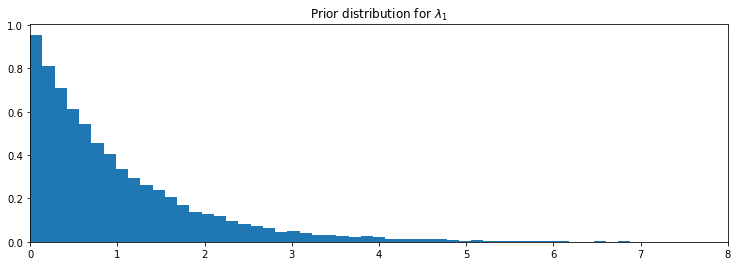

In [16]:
figsize(12.5, 4)

samples = [lambda_1.random() for i in range(20000)]
plt.hist(samples, bins=70, normed=True, histtype="stepfilled")
plt.title("Prior distribution for $\lambda_1$")
plt.xlim(0,8)

In [18]:
data = np.array([10, 5])
fixed_variable = pm.Poisson("fxd", 1, value = data, observed=True)
print("value: ", fixed_variable.value)
print("calling .random()")
fixed_variable.random()
print("value: ", fixed_variable.value)

value:  [10  5]
calling .random()
value:  [10  5]


In [21]:
data = np.array([10,25,15,20,35])
obs = pm.Poisson("obs", lambda_, value=data, observed=True)
print(obs.value)

[10 25 15 20 35]
